In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from solver import Solver

In [13]:
def node_label(node) -> str:
    if node[2].upper - node[2].lower <= 1e-9:
        return f"{node[1].name} = {node[2].upper}"
    else:
        return f"{node[2].lower}≤{node[1].name}≤{node[2].upper}"

def node_color(node, origins, drains):
    # if node in origins:
    #     return "green"
    # elif node in drains:
    #     return "red"
    if node[1].is_conv():
        return "blue"
    elif node[1].is_general:
        return "yellow"
    return "magenta"

In [24]:
sl = Solver("problems/problem_from_article_mod.lp")
graphes = sl.start()
print(sl.result())

primal value: None	dual value: -1.0	number of branching: 1	number of infisible nodes: 1
primal value: None	dual value: -1.0	number of branching: 2	number of infisible nodes: 2
primal value: None	dual value: -1.0	number of branching: 3	number of infisible nodes: 3
primal value: None	dual value: -1.0	number of branching: 4	number of infisible nodes: 4
primal value: None	dual value: -1.0	number of branching: 5	number of infisible nodes: 5
primal value: None	dual value: -1.0	number of branching: 6	number of infisible nodes: 6
primal value: None	dual value: -1.0	number of branching: 7	number of infisible nodes: 8
MipState [State.Infeasible] {
	primal value: None
	dual value: None
	number of branching: 7
	number of infisible nodes: 8
}


In [4]:
graphes

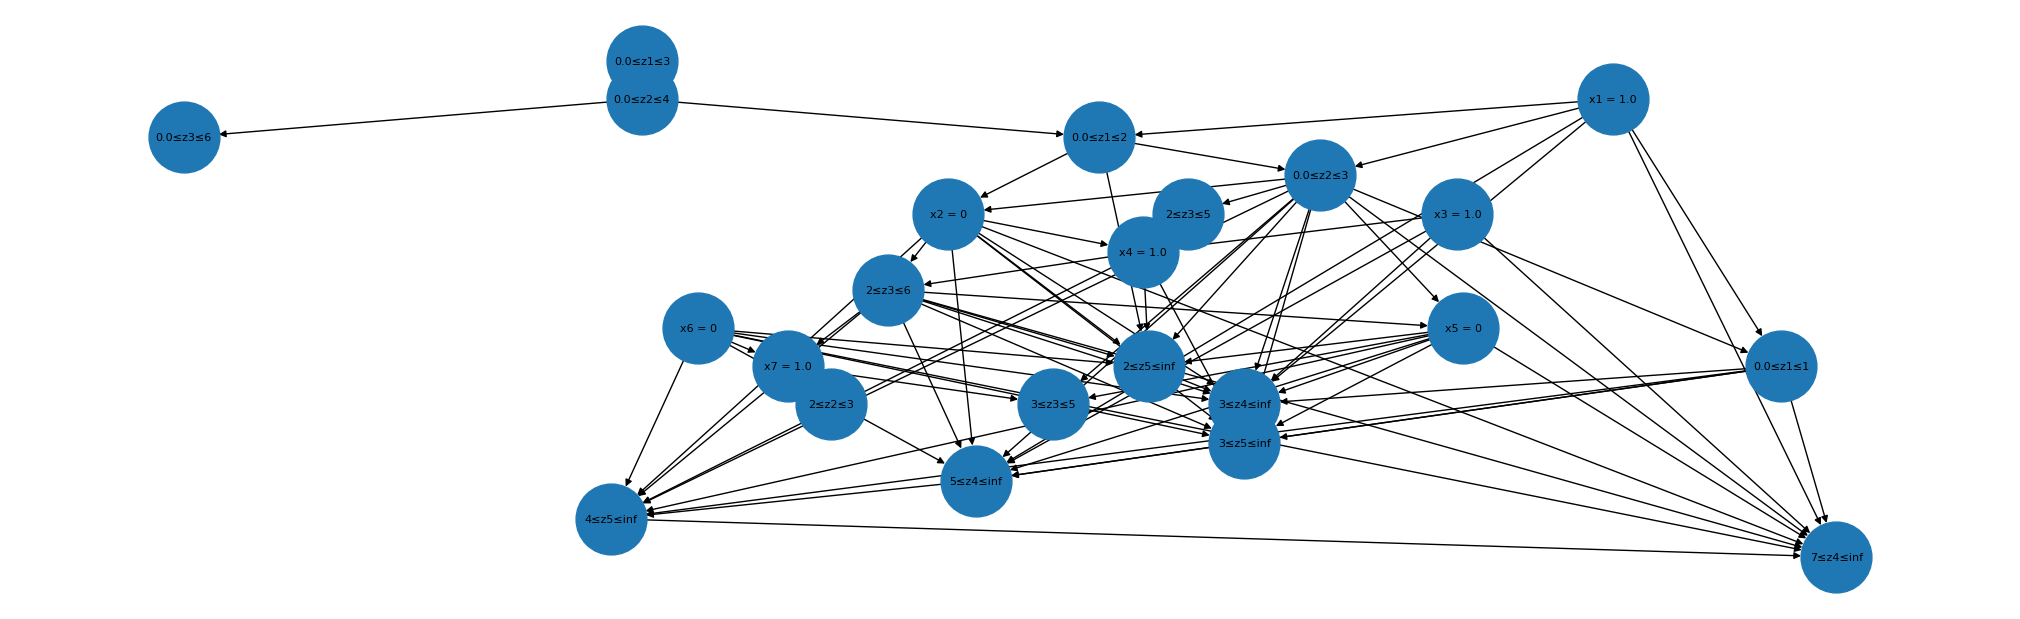

In [25]:
nodes, edges = graphes[0].to_plot_info()

G = nx.DiGraph()
for edge in edges:
    #print(edge)
    G.add_edge(node_label(edge[0]), node_label(edge[1]))

pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

plt.figure(3,figsize=(20,6)) 
nx.draw(G,
        pos,
        with_labels=True, 
        font_size=8, 
        node_size=2600, 
        #node_color=[node_color(n, origins, drains) for n in nodes]
       )

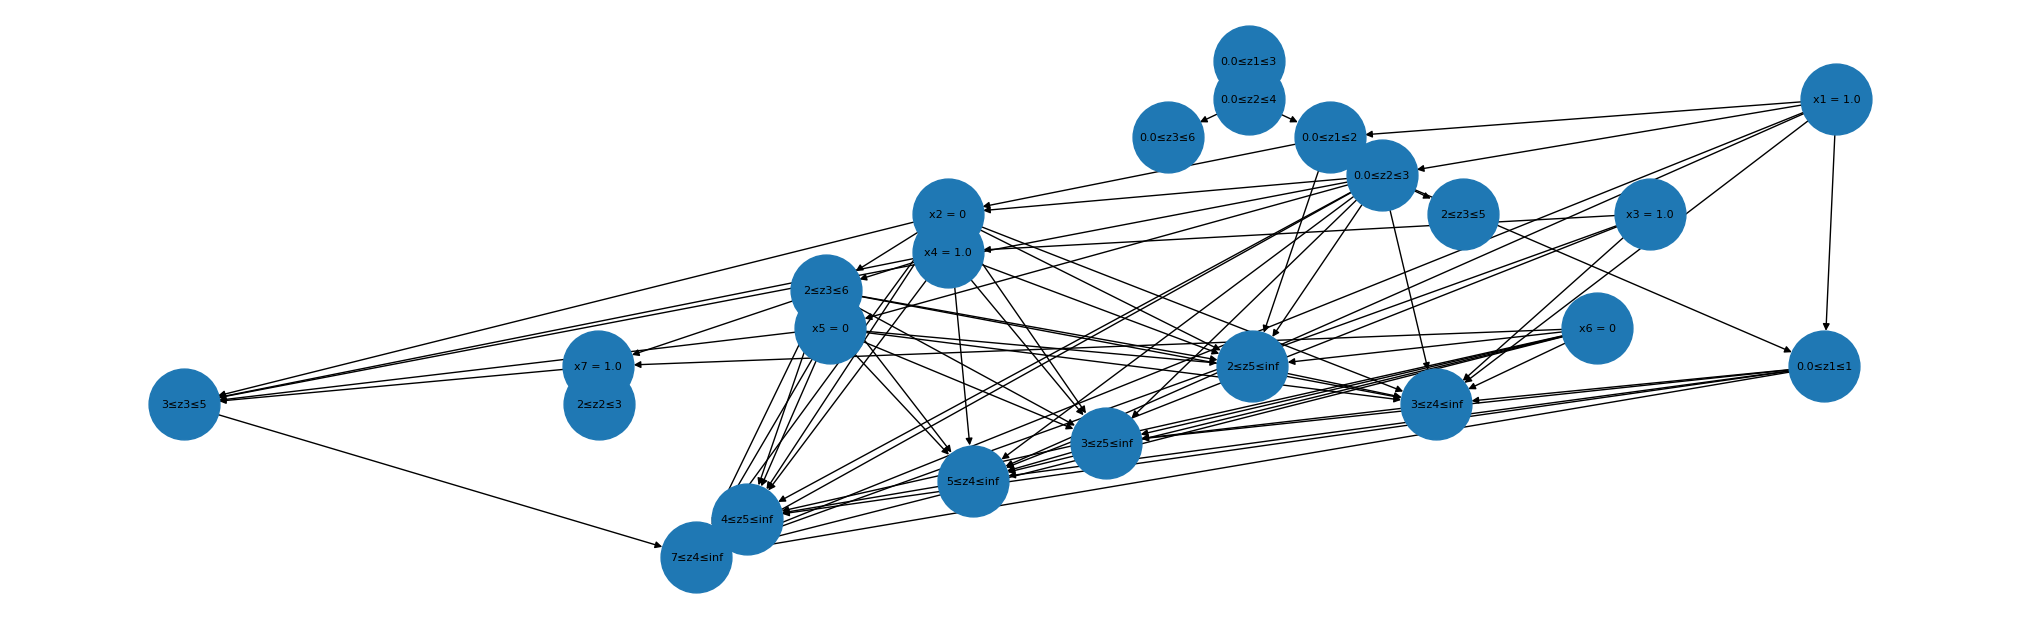

In [21]:
nodes, edges = graphes[5].to_plot_info()

G = nx.DiGraph()
for edge in edges:
    #print(edge)
    G.add_edge(node_label(edge[0]), node_label(edge[1]))

pos = nx.nx_agraph.graphviz_layout(G, prog="dot")

plt.figure(3,figsize=(20,6)) 
nx.draw(G,
        pos,
        with_labels=True, 
        font_size=8, 
        node_size=2600, 
        #node_color=[node_color(n, origins, drains) for n in nodes]
       )